<a href="https://colab.research.google.com/github/nceder/qpb4e/blob/main/code/Case%20Study/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case study

In this case study we'll walk through using Python to fetch some data, clean it, and then graph it. This may be a short project, but it combines a number of features of the language we've dicussed, and gives you a chance to a see a project worked through from beginning to end. At almost every step we will also briefly call out alternatives and enhancements you can make.

Global temperature change is the topic of much discussion. But those discussions are based on a global scale, Suppose I want to know what the temperatures have been doing near where I am? One way of finding out would be to get some historical data for my location and process that data and plot it to see exactly what's been happening.

Fortunately, there are several sources of historical weather data that are freely available. We're going to talk through using data from the Global Historical Climatology Network, which has data from around the world. You may find other sources, which may have different data formats, but the steps and the processes we discuss here should be generally applicable to any data set.

###  Downloading the data

The first step will be to get the data. There is an archive of daily historical weather data at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/, which has a wide array of datay. The first step will be to figure out which files we want and exactly where they are, and then to download them. Once we have the data, we can move on to processing and ultimately displaying our results.

In order to download the files, which are accessable via HTTPS, we will need the requests library. We can get requests with `pip install requests` at the command prompt. Once we have requests our first step will be to fetch the `readme.txt` file, which can guide us as the formats and location of the data files we'll want.

In [2]:
# import requests

import requests

In [3]:
# get readme.txt file

r = requests.get('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt')
readme = r.text

When we look at the readme file, it looks something like this:

In [4]:
print(readme)

README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) 
Version 3.31

--------------------------------------------------------------------------------
How to cite:

Note that the GHCN-Daily dataset itself now has a DOI (Digital Object Identifier)
so it may be relevant to cite both the methods/overview journal article as well 
as the specific version of the dataset used.

The journal article describing GHCN-Daily is:
Menne, M.J., I. Durre, R.S. Vose, B.E. Gleason, and T.G. Houston, 2012:  An overview 
of the Global Historical Climatology Network-Daily Database.  Journal of Atmospheric 
and Oceanic Technology, 29, 897-910, doi:10.1175/JTECH-D-11-00103.1.

To acknowledge the specific version of the dataset used, please cite:
Menne, M.J., I. Durre, B. Korzeniewski, S. McNeill, K. Thomas, X. Yin, S. Anthony, R. Ray, 
R.S. Vose, B.E.Gleason, and T.G. Houston, 2012: Global Historical Climatology Network - 
Daily (GHCN-Daily), Version 3. [indicate subset used following decima

In particular, we'll be interested in section II which lists the contents.

```
II. CONTENTS OF ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily

all:                  Directory with ".dly" files for all of GHCN-Daily
gsn:                  Directory with ".dly" files for the GCOS Surface Network
                     (GSN)
hcn:                  Directory with ".dly" files for U.S. HCN
by_year:              Directory with GHCN Daily files parsed into yearly
                      subsets with observation times where available.  See the
		      /by_year/readme.txt and
		      /by_year/ghcn-daily-by_year-format.rtf
		      files for further information
grid:	              Directory with the GHCN-Daily gridded dataset known
                      as HadGHCND
papers:		      Directory with pdf versions of journal articles relevant
                      to the GHCN-Daily dataset
figures:	      Directory containing figures that summarize the inventory
                      of GHCN-Daily station records		    

ghcnd-all.tar.gz:  TAR file of the GZIP-compressed files in the "all" directory
ghcnd-gsn.tar.gz:  TAR file of the GZIP-compressed "gsn" directory
ghcnd-hcn.tar.gz:  TAR file of the GZIP-compressed "hcn" directory

ghcnd-countries.txt:  List of country codes (FIPS) and names
ghcnd-inventory.txt:  File listing the periods of record for each station and
                      element
ghcnd-stations.txt:   List of stations and their metadata (e.g., coordinates)
ghcnd-states.txt:     List of U.S. state and Canadian Province codes
                      used in ghcnd-stations.txt
ghcnd-version.txt:    File that specifies the current version of GHCN Daily

readme.txt:           This file
status.txt:           Notes on the current status of GHCN-Daily
```

As we look at the files available we cansee that `ghcnd-inventory.txt` has a listing of the recording periods for each station which will help us find a good data set, and `ghcnd-stations.txt` lists the stations which should help us find the station closest to our location, so we'll grab those two files first.

```
II. CONTENTS OF ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily

all:                  Directory with ".dly" files for all of GHCN-Daily
gsn:                  Directory with ".dly" files for the GCOS Surface Network
                     (GSN)
hcn:                  Directory with ".dly" files for U.S. HCN
by_year:              Directory with GHCN Daily files parsed into yearly
                      subsets with observation times where available.  See the
		      /by_year/readme.txt and
		      /by_year/ghcn-daily-by_year-format.rtf
		      files for further information
grid:	              Directory with the GHCN-Daily gridded dataset known
                      as HadGHCND
papers:		      Directory with pdf versions of journal articles relevant
                      to the GHCN-Daily dataset
figures:	      Directory containing figures that summarize the inventory
                      of GHCN-Daily station records		    

ghcnd-all.tar.gz:  TAR file of the GZIP-compressed files in the "all" directory
ghcnd-gsn.tar.gz:  TAR file of the GZIP-compressed "gsn" directory
ghcnd-hcn.tar.gz:  TAR file of the GZIP-compressed "hcn" directory

ghcnd-countries.txt:  List of country codes (FIPS) and names
ghcnd-inventory.txt:  File listing the periods of record for each station and
                      element
ghcnd-stations.txt:   List of stations and their metadata (e.g., coordinates)
ghcnd-states.txt:     List of U.S. state and Canadian Province codes
                      used in ghcnd-stations.txt
ghcnd-version.txt:    File that specifies the current version of GHCN Daily

readme.txt:           This file
status.txt:           Notes on the current status of GHCN-Daily
```


In [5]:
# get inventory and stations files

r = requests.get('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt')
inventory_txt = r.text
r = requests.get('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt')
stations_txt = r.text

Once we have those files, we can save them to our local disk, so that we won't need to download them again if we need to go back to the original data.

In [6]:
# save both the inventory and stations files to disk, in case we need them

with open("inventory.txt", "w") as inventory_file:
    inventory_file.write(inventory_txt)

with open("stations.txt", "w") as stations_file:
    stations_file.write(stations_txt)


We'll start by looking at the inventory file. Here's what the first 137 characters show us:

In [7]:
print(inventory_txt[:137])

ACW00011604  17.1167  -61.7833 TMAX 1949 1949
ACW00011604  17.1167  -61.7833 TMIN 1949 1949
ACW00011604  17.1167  -61.7833 PRCP 1949 1949


If we look at section VII of the `readme.txt` file we can see that the format of the inventory file is:
```
VII. FORMAT OF "ghcnd-inventory.txt"

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEMENT      32-35   Character
FIRSTYEAR    37-40   Integer
LASTYEAR     42-45   Integer
------------------------------

These variables have the following definitions:

ID         is the station identification code.  Please see "ghcnd-stations.txt"
           for a complete list of stations and their metadata.

LATITUDE   is the latitude of the station (in decimal degrees).

LONGITUDE  is the longitude of the station (in decimal degrees).

ELEMENT    is the element type.  See section III for a definition of elements.

FIRSTYEAR  is the first year of unflagged data for the given element.

LASTYEAR   is the last year of unflagged data for the given element.
```

From this descrption we can tell that inventory list has most of the information we need to find out what station we'll want to look at. We can use the latitude and longitude to find the stations closest to us, and then we can use the first and years years to a station with records covering a long span of time.

The only question this file leaves us with is what the "ELEMENT" field is, for that it suggests we look at section III. In section III (which we'll look at in more detail later) we find the following description of the main elements:

```
ELEMENT    is the element type.   There are five core elements as well as a number
           of addition elements.  
	   
	   The five core elements are:

           PRCP = Precipitation (tenths of mm)
           SNOW = Snowfall (mm)
           SNWD = Snow depth (mm)
           TMAX = Maximum temperature (tenths of degrees C)
           TMIN = Minimum temperature (tenths of degrees C)
```

For our purpose we'll be interested in the TMAX and TMIN elements, which are maximum and minimum temperatures in tenths of degrees Centigrade.

### Parsing the inventory data

The `readme.txt` file tells us what we've got in the inventory file, so we can parse the data into a more usable format. We could just store the parsed inventory data as a list of lists or list of tuples, but it takes only a little more effort to use namedtuple from the collections library to create a custom class with the attributes named.

In [8]:
# parse to named tuples

# use namedtuple to create a custom Inventory class
from collections import namedtuple
Inventory = namedtuple("Inventory", ['station', 'latitude', 'longitude', 'element', 'start', 'end'])

Using the Inventory class we created is very straightforward - we simply need to create each instance from the appropriate values, in this case a parsed row of inventory data.

The parsing will involve two steps. First, we need to pick out slices of a line according to the field sizes specified. As you look at the field descriptions in the readme file, it's also clear that there is an extra space between files, which would need to be considered in coming up with any approach to parsing. In our case, since we're specifying each slice, the extra spaces are ignored. In addition, since the sizes of the station and element fields exactly correspond to the values stored in them we shouldn't need to worry about stripping excess spaces from them.

The second thing that would be nice to do is to convert the latitude and longitude values to floats and the start and end years to ints. We could do this at later stage of data cleaning, and in fact if the data is inconsistent and doesn't have values that will convert correctly in every row, we might want to wait. But in this case the data will let us handle these conversions in the parsing step, so let's do it.

In [9]:
# parse inventory lines and convert some values to floats and ints

inventory = [Inventory(x[0:11], float(x[12:20]), float(x[21:30]), x[31:35], int(x[36:40]), int(x[41:45]))
             for x in inventory_txt.split("\n") if x.startswith("US")]

for line in inventory[:5]:
    print(line)

Inventory(station='US009052008', latitude=43.7333, longitude=-96.6333, element='TMAX', start=2008, end=2016)
Inventory(station='US009052008', latitude=43.7333, longitude=-96.6333, element='TMIN', start=2008, end=2016)
Inventory(station='US009052008', latitude=43.7333, longitude=-96.6333, element='PRCP', start=2008, end=2016)
Inventory(station='US009052008', latitude=43.7333, longitude=-96.6333, element='SNWD', start=2009, end=2016)
Inventory(station='US10RMHS145', latitude=40.5268, longitude=-105.1113, element='PRCP', start=2004, end=2004)


### Selecting a station based on latitude and longitude

Now that the inventory is loaded we can use the latitude and longitude to find the stations closest to our location and then pick the one with the longest run of temperatures base on start and end years. As we look at even the first line of the data, we can see two things to worry about. First, there are various different element types, but we're only concerned with TMIN and TMAX, for min and max temeprature. Second, none of the first inventory entries we see cover more than a few years. If we're going to be looking for a historical perspectinve, we'll want to find a much longer run of temperature data.

To do pick out what we need quickly we can use a list comprehension to make a sub list of only the station inventory items where the element is either TMIN or TMAX. The other thing that we care about is getting a station with a long run of data so while we're creating this sub list, let's also make sure that the start year is before 1920 and the end year is at least 2015. That way we'll only be looking at stations with at least 95 years of data.

In [10]:
inventory_temps = [x for x in inventory if x.element in ['TMIN', 'TMAX']
                   and x.end >= 2015 and x.start < 1920]
inventory_temps[:5]

[Inventory(station='USC00010252', latitude=31.3072, longitude=-86.5225, element='TMAX', start=1912, end=2018),
 Inventory(station='USC00010252', latitude=31.3072, longitude=-86.5225, element='TMIN', start=1912, end=2018),
 Inventory(station='USC00010583', latitude=30.8839, longitude=-87.7853, element='TMAX', start=1915, end=2024),
 Inventory(station='USC00010583', latitude=30.8839, longitude=-87.7853, element='TMIN', start=1915, end=2024),
 Inventory(station='USC00011694', latitude=32.8158, longitude=-86.6044, element='TMAX', start=1893, end=2024)]

Looking at the first five records in our new list, we're in better shape. We now have only temperature records, and the start and end years show we have longer runs.

That leaves the problem of selecting the station nearest to our location. To do that we'll want to compare the latitude and longitude of the station inventories to that of our location. There are various ways to get the latitude and longitude of any place but probably the easiest is to use an online mapping application or online search. When I do that for the Chicago Loop, I get a latitude of 41.882 and a longitude of -87.629.

Since we're interested in the stations closest to our location, that implies sorting based on how close the latitude and longitude of the stations are to that of our location. Sorting a list is easy enough, and sorting by latitude and longitude is not that hard, but the question is how do we sort by the distance from our latitude and longitude?

The answer is to define a key funtion for our sort that gets the difference between our latitude and the station latitude, and the difference between our longitude and the station longitude and combines them into one number. The only other thing to remember is that we'll want to add the absolute value of the differences before we combine them to avoid having a high negative difference combined with an equally high positive difference fool our sort.

In [11]:
# Downtown Chicago, obtained via online map
latitude, longitude = 41.882, -87.629

inventory_temps.sort(key=lambda x:  abs(latitude-x.latitude) + abs(longitude-x.longitude))

inventory_temps[:20]

[Inventory(station='USC00110338', latitude=41.7803, longitude=-88.3092, element='TMAX', start=1893, end=2024),
 Inventory(station='USC00110338', latitude=41.7803, longitude=-88.3092, element='TMIN', start=1893, end=2024),
 Inventory(station='USC00112736', latitude=42.0628, longitude=-88.2861, element='TMAX', start=1897, end=2024),
 Inventory(station='USC00112736', latitude=42.0628, longitude=-88.2861, element='TMIN', start=1897, end=2024),
 Inventory(station='USC00476922', latitude=42.7028, longitude=-87.7858, element='TMAX', start=1896, end=2024),
 Inventory(station='USC00476922', latitude=42.7028, longitude=-87.7858, element='TMIN', start=1896, end=2024),
 Inventory(station='USC00124837', latitude=41.6117, longitude=-86.7297, element='TMAX', start=1897, end=2024),
 Inventory(station='USC00124837', latitude=41.6117, longitude=-86.7297, element='TMIN', start=1897, end=2024),
 Inventory(station='USC00119021', latitude=40.7831, longitude=-87.7372, element='TMAX', start=1893, end=2020),
 

### Selecting a station and getting the station metadata

As we look at the top 20 entries in our newly sorted list it seems that the first station, USC00110338, is a good fit. It's got both TMIN and TMAX and one of the longer series, starting in 1893 and running up through 2017, for over 120 years of data. So we'll save that station into our station variable and quickly parse the station data we've already grabbed to pick up a little more information about the station.

Back in the readme file we find the following information about the station data:

```
IV. FORMAT OF "ghcnd-stations.txt"

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------

These variables have the following definitions:

ID         is the station identification code.  Note that the first two
           characters denote the FIPS  country code, the third character
           is a network code that identifies the station numbering system
           used, and the remaining eight characters contain the actual
           station ID.

           See "ghcnd-countries.txt" for a complete list of country codes.
	       See "ghcnd-states.txt" for a list of state/province/territory codes.

           The network code  has the following five values:

           0 = unspecified (station identified by up to eight
	       alphanumeric characters)
	   1 = Community Collaborative Rain, Hail,and Snow (CoCoRaHS)
	       based identification number.  To ensure consistency with
	       with GHCN Daily, all numbers in the original CoCoRaHS IDs
	       have been left-filled to make them all four digits long.
	       In addition, the characters "-" and "_" have been removed
	       to ensure that the IDs do not exceed 11 characters when
	       preceded by "US1". For example, the CoCoRaHS ID
	       "AZ-MR-156" becomes "US1AZMR0156" in GHCN-Daily
       C = U.S. Cooperative Network identification number (last six
           characters of the GHCN-Daily ID)
	   E = Identification number used in the ECA&D non-blended
	       dataset
	   M = World Meteorological Organization ID (last five
	       characters of the GHCN-Daily ID)
	   N = Identification number used in data supplied by a
	       National Meteorological or Hydrological Center
	   R = U.S. Interagency Remote Automatic Weather Station (RAWS)
	       identifier
	   S = U.S. Natural Resources Conservation Service SNOwpack
	       TELemtry (SNOTEL) station identifier
           W = WBAN identification number (last five characters of the
           GHCN-Daily ID)

LATITUDE   is latitude of the station (in decimal degrees).

LONGITUDE  is the longitude of the station (in decimal degrees).

ELEVATION  is the elevation of the station (in meters, missing = -999.9).


STATE      is the U.S. postal code for the state (for U.S. stations only).

NAME       is the name of the station.

GSN FLAG   is a flag that indicates whether the station is part of the GCOS
           Surface Network (GSN). The flag is assigned by cross-referencing
           the number in the WMOID field with the official list of GSN
           stations. There are two possible values:

           Blank = non-GSN station or WMO Station number not available
           GSN   = GSN station

HCN/      is a flag that indicates whether the station is part of the U.S.
CRN FLAG  Historical Climatology Network (HCN).  There are three possible
          values:

           Blank = Not a member of the U.S. Historical Climatology
	           or U.S. Climate Reference Networks
           HCN   = U.S. Historical Climatology Network station
	       CRN   = U.S. Climate Reference Network or U.S. Regional Climate
	           Network Station

WMO ID     is the World Meteorological Organization (WMO) number for the
           station.  If the station has no WMO number (or one has not yet
	       been matched to this station), then the field is blank.
```

While I might care more about the metadata fields for more serious research, for my purpose right now, I want to the start and end year from the inventory records to the rest of the station metadata in the station file.

There are a number of ways I could sift through the stations file to find the one station that matches the station ID I selected above. I could create a for loop to go through each line and break out when I found it, I could split the data into lines, and the sort and use a binary search, and so on. And depending on the nature and amount of data one approach or another might be appropriate. In this case, since I have the data loaded already and it's not too large, my preference would be to use a list comprehension to return a list with it's one element being the station I'm looking for.

In [12]:
station_id = 'USC00110338'

# parse stations
Station = namedtuple("Station", ['station_id', 'latitude', 'longitude', 'elevation', 'state', 'name', 'start', 'end'])

stations = [(x[0:11], float(x[12:20]), float(x[21:30]), float(x[31:37]), x[38:40].strip(), x[41:71].strip())
            for x in stations_txt.split("\n") if x.startswith(station_id)]

station = Station(*stations[0] + (inventory_temps[0].start, inventory_temps[0].end))
print(station)


Station(station_id='USC00110338', latitude=41.7803, longitude=-88.3092, elevation=205.7, state='IL', name='AURORA WATER', start=1893, end=2024)


At this point I've identified that I want weather data from the station at Aurora Illinois, which is the nearest station to downtown Chicago with over a century of temperature data.

## Fetching and parsing the actual weather data

With the station identified, the next step is to fetch the actualy weather data for that station and parse it. The process will be quite similar to what we did above.

### Fetching the data

First, let's fetch the data file and save it, in case we need to go back to it.

In [15]:
# fetch daily records for selected station

r = requests.get('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/{}.dly'.format(station.station_id))
weather = r.text

# save into a text file, so we won't need to fetch again

with open('weather_{}.txt'.format(station), "w") as weather_file:
    weather_file.write(weather)

In [16]:
# read from saved daily file if needed (only used if we want to start the process over without downloadng the file)

with open('weather_{}.txt'.format(station)) as weather_file:
    weather = weather_file.read()

In [17]:
print(weather[:540])

USC00110338189301TMAX  -11  6  -44  6 -139  6  -83  6 -100  6  -83  6  -72  6  -83  6  -33  6 -178  6 -150  6 -128  6 -172  6 -200  6 -189  6 -150  6 -106  6  -61  6  -94  6  -33  6  -33  6  -33  6  -33  6    6  6  -33  6  -78  6  -33  6   44  6  -89 I6  -22  6    6  6
USC00110338189301TMIN  -50  6 -139  6 -250  6 -144  6 -178  6 -228  6 -144  6 -222  6 -178  6 -250  6 -200  6 -206  6 -267  6 -272  6 -294  6 -294  6 -311  6 -200  6 -233  6 -178  6 -156  6  -89  6 -200  6 -194  6 -194  6 -178  6 -200  6  -33 I6 -156  6 -139  6 -167  6



### Parsing the weather data

Again, now that we have the data we can see it's quite a bit more complex that the station and inventory data. Clearly it's time to head back to the `readme.txt` file, and section III, which is the description of a weather data file. There are a lot of options, so we'll filter them down to the ones that concern us, and leave out the other element types as well as the whole system of flags specifying the source, quality, type of the values.

```
III. FORMAT OF DATA FILES (".dly" FILES)

Each ".dly" file contains data for one station.  The name of the file
corresponds to a station's identification code.  For example, "USC00026481.dly"
contains the data for the station with the identification code USC00026481).

Each record in a file contains one month of daily data.  The variables on each
line include the following:

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
YEAR         12-15   Integer
MONTH        16-17   Integer
ELEMENT      18-21   Character
VALUE1       22-26   Integer
MFLAG1       27-27   Character
QFLAG1       28-28   Character
SFLAG1       29-29   Character
VALUE2       30-34   Integer
MFLAG2       35-35   Character
QFLAG2       36-36   Character
SFLAG2       37-37   Character
  .           .          .
  .           .          .
  .           .          .
VALUE31    262-266   Integer
MFLAG31    267-267   Character
QFLAG31    268-268   Character
SFLAG31    269-269   Character
------------------------------

These variables have the following definitions:

ID         is the station identification code.  Please see "ghcnd-stations.txt"
           for a complete list of stations and their metadata.
YEAR       is the year of the record.

MONTH      is the month of the record.

ELEMENT    is the element type.   There are five core elements as well as a number
           of addition elements.  
	   
	   The five core elements are:

           PRCP = Precipitation (tenths of mm)
           SNOW = Snowfall (mm)
           SNWD = Snow depth (mm)
           TMAX = Maximum temperature (tenths of degrees C)
           TMIN = Minimum temperature (tenths of degrees C)
	   
...
		   
VALUE1     is the value on the first day of the month (missing = -9999).

MFLAG1     is the measurement flag for the first day of the month.

QFLAG1     is the quality flag for the first day of the month.

SFLAG1     is the source flag for the first day of the month.
	   
VALUE2     is the value on the second day of the month

MFLAG2     is the measurement flag for the second day of the month.

QFLAG2     is the quality flag for the second day of the month.

SFLAG2     is the source flag for the second day of the month.

... and so on through the 31st day of the month.  Note: If the month has less
than 31 days, then the remaining variables are set to missing (e.g., for April,
VALUE31 = -9999, MFLAG31 = blank, QFLAG31 = blank, SFLAG31 = blank).
```

The key points we care about right now are that the station ID is the 11 characters of a row, the year is the next 4, the month the next two, and the element the next 4 after that. After that there are 31 slots for daily data, with each slot consisting of 5 characters for the temperature, expressed in tenths of a degree centigrade, and 3 characters of flags. As mentioned earlier, we can disregard the flags for this exercise. We can also see that missing values for the temperatures are coded with -9999 if the that day is not in the month, so for a typical February, for example, the 29th, 30th, and 31st values would be -9999.

As we process our data in this exercise we're looking to get overall trends, so we don't need to worry much about individual day so we can instead find average values for the month. We can instead save the maximum, minimum and mean values for the entire month and use those.

This means that to process each line of weather data we need to do several things. We need to split the line into its separate fields abd we need to ignore or discard the flags for each daily value.  We also need toremove the values with -9999, convert the year and month into ints and the temperature values into floats, keeping in mind that the temperature readings are in tenths of degrees centigrade. Finally we need to calculate the average value as well as picking out the high and low values.

To accomplish all of this we can take a couple of approaches. One would be to do several passes over the data, splitting into fields, discarding the placeholders, converting strings to numbers, and finally calculating the summary values. Or we can write a function that performs all of these operatons on a single line, and do everything in one pass. Both can be valid approaches, and in this case we'll take the latter approach and create a function `parse_line` do perform all of our data transformations.

In [18]:
def parse_line(line):
    """ parses line of weather data
        removes values of -9999 (missing value)
    """

    # return None if line is empty
    if not line:
        return None

    # split out first 4 fields and string containing temperature values
    record, temperature_string = (line[:11], int(line[11:15]), int(line[15:17]), line[17:21]), line[21:]

    # raise exception if the temperature string is too short
    if len(temperature_string) < 248:
        raise ValueError("String not long enough - {} {}".format(temperature_string, str(line)))

    # use a list comprehension on the temperature_string to extract and convert the
    values = [float(temperature_string[i:i + 5])/10 for i in range(0, 248, 8)
              if not temperature_string[i:i + 5].startswith("-9999")]

    # get the number of values, the max and min, and calculate average
    count = len(values)
    tmax = round(max(values), 1)
    tmin = round(min(values), 1)
    mean = round(sum(values)/count, 1)

    # add the temperature summary values to the record fields extracted earlier and return
    return record + (tmax, tmin, mean, count)

If we test this function with the first line of our raw weather data, we get the following result:

In [19]:
parse_line(weather[:270])

('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31)

So it looks like we have a function that will work to parse our data. If that works then we can parse the weather data and either store it or continue on with our processing.

In [20]:
# process all weather data

# list comprehension, will not parse empty lines
weather_data = [parse_line(x) for x in weather.split("\n") if x]

len(weather_data)

weather_data[:10]

[('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31),
 ('USC00110338', 1893, 1, 'TMIN', -3.3, -31.1, -19.2, 31),
 ('USC00110338', 1893, 1, 'PRCP', 8.9, 0.0, 1.1, 31),
 ('USC00110338', 1893, 1, 'SNOW', 10.2, 0.0, 1.0, 31),
 ('USC00110338', 1893, 1, 'WT16', 0.1, 0.1, 0.1, 2),
 ('USC00110338', 1893, 1, 'WT18', 0.1, 0.1, 0.1, 11),
 ('USC00110338', 1893, 2, 'TMAX', 5.6, -17.2, -0.9, 27),
 ('USC00110338', 1893, 2, 'TMIN', 0.6, -26.1, -11.7, 27),
 ('USC00110338', 1893, 2, 'PRCP', 15.0, 0.0, 2.0, 28),
 ('USC00110338', 1893, 2, 'SNOW', 12.7, 0.0, 0.6, 28)]

We now have all the weather records, not just the temperature records, parsed and in our list.

### Saving the weather data in a database (Optional)

At this point we can save all of the weather records (and the station records and inventory records as well, if we want) into a database. This would let us come back in later sessions and use the same data without having to go the hassle of fetching and parsing the data again.

As an example, the code below would be how we could save the weather data into a SQLite3 database.

In [21]:
import sqlite3

conn = sqlite3.connect("weather_data.db")
cursor = conn.cursor()

In [22]:
# create weather table

create_weather = """CREATE TABLE "weather" (
    "id" text NOT NULL,
    "year" integer NOT NULL,
    "month" integer NOT NULL,
    "element" text NOT NULL,
    "max" real,
    "min" real,
    "mean" real,
    "count" integer)"""
cursor.execute(create_weather)
conn.commit()

In [23]:
# store parsed weather data in database

for record in weather_data:
    cursor.execute("""insert into weather (id, year, month, element, max, min, mean, count) values (?,?,?,?,?,?,?,?) """,
                      record)

conn.commit()

Once we have the data stored we could retreive it from the database with code like the below, which fetches only the TMAX records.

In [24]:
cursor.execute("""select * from weather where element='TMAX' order by year, month""")
tmax_data = cursor.fetchall()
tmax_data[:5]

[('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31),
 ('USC00110338', 1893, 2, 'TMAX', 5.6, -17.2, -0.9, 27),
 ('USC00110338', 1893, 3, 'TMAX', 20.6, -7.2, 5.6, 30),
 ('USC00110338', 1893, 4, 'TMAX', 28.9, 3.3, 13.5, 30),
 ('USC00110338', 1893, 5, 'TMAX', 30.6, 7.2, 19.2, 31)]

### Selecting and graphing data

Since we're only concerned with temperature we need to select just the temperature records. We can do that quickly enough by just usign a couple of list comprehensions to pick out a list for TMAX and one for TMIN. Or we could use the features of pandas, which we'll be using for graphing the date, to filter out the records we don't want. Since were more concerned with pure Python than pandas, we'll take the first approach.

In [25]:
tmax_data = [x for x in weather_data if x[3] == 'TMAX']
tmin_data = [x for x in weather_data if x[3] == 'TMIN']
tmin_data[:5]

[('USC00110338', 1893, 1, 'TMIN', -3.3, -31.1, -19.2, 31),
 ('USC00110338', 1893, 2, 'TMIN', 0.6, -26.1, -11.7, 27),
 ('USC00110338', 1893, 3, 'TMIN', 3.3, -13.3, -4.6, 31),
 ('USC00110338', 1893, 4, 'TMIN', 12.2, -5.6, 2.2, 30),
 ('USC00110338', 1893, 5, 'TMIN', 14.4, -0.6, 5.7, 31)]

#### Using pandas to graph our data

At this point we have our data cleaned and ready to graph. To make the graphing easier we can use pandas and matplotlib as described in chapter 25. In order to do this we need to have a Jupyter server running and have pandas and matplotlib installed. We can make sure that they are installed from within our Jupyter notebook by using the following command:

In [27]:
import pandas as pd
%matplotlib inline

Once pandas and matplotlib are installed we can load pandas and create data frames for our TMAX and TMIN data.

In [28]:
tmax_df = pd.DataFrame(tmax_data, columns=['Station', 'Year', 'Month', 'Element', 'Max', 'Min', 'Mean', 'Days'])
tmin_df = pd.DataFrame(tmin_data, columns=['Station', 'Year', 'Month', 'Element', 'Max', 'Min', 'Mean', 'Days'])

We could plot the monthly values, but the 123 years times 12 months of data is almost 1500 data points, and the cycle of seasons also makes picking out patterns difficult.

Instead, it would probably make more sense to average the high, low, and mean monthly values into yearly values and plot those. We could do this in python, but since we already have our data loaded in a pandas data frame we can use that to group by year and give us the mean values.

<Axes: xlabel='Year'>

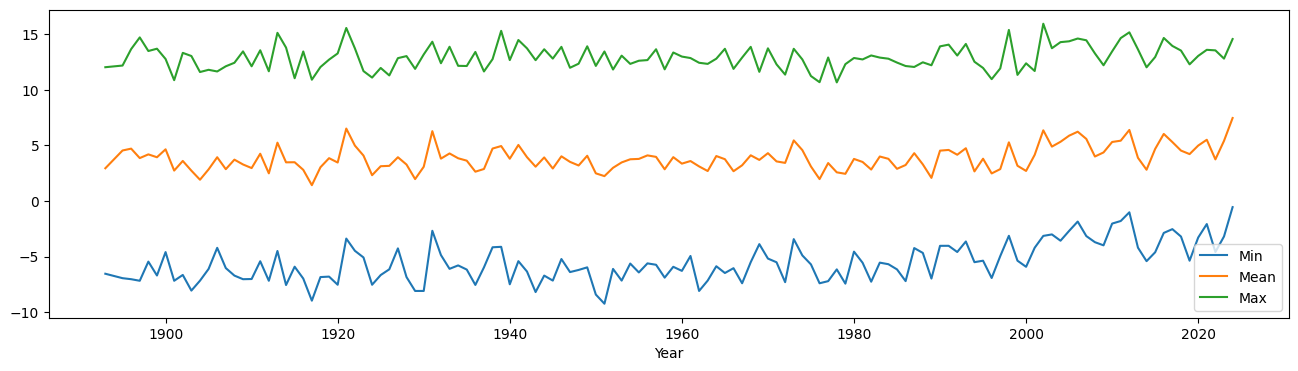

In [29]:
# select Year, Min, Max, Mean columns, group by year, average and line plot

tmin_df[['Year','Min', 'Mean', 'Max']].groupby('Year').mean().plot( kind='line', figsize=(16, 4))

The result above has a fair amount of variation, but does seem to indicate that the minimum temperature, at least, has been on the rise the past 20 years.

Note that if you wanted to get the same graph without using Jupyter notebook and matplotlib, you could use still use pandas, but write to a csv or excel file using the data frame's `to_csv` or `to_excel` methods. Then you could load the resulting file into a spreadsheet and graph from there.